In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [3]:
data = pd.read_csv("/Users/muhammadzohaibirfan/Uni/Hkust projects (maybe)/Star Classification/Star3642_balanced.csv")
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


# Understanding Data

In [50]:
data.shape

(3642, 7)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   int64  
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 199.3 KB


In [52]:
data.describe()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,345.969797,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,141.225224,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,0.000000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,244.000000,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,375.000000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,462.000000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,583.000000,29.249165,1.000000


In [53]:
data.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

# Data Fields Present

Vmag: Visual Apparent Magnitude of the Star

Plx : Distance Between the Star and the Earth

e_Plx:Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)

B-V : B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)

SpType: Spectral type

Amag: Absolute Magnitude of the Star

TargetClass: Whether the Star is Dwarf (0) or Giant (1)

In [4]:
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [5]:
distinct_values_count = data["SpType"].nunique()

In [6]:
distinct_values_count

584

In [7]:
data.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

# Encoding data value from object to numerical

In [8]:
encoder = LabelEncoder()

for c in data.columns[0:]:
    if(data[c].dtype == "object"):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1


In [9]:
min_value = data['SpType'].min()
max_value = data['SpType'].max()

print(min_value,max_value)

0 583


# Splitting Data

In [10]:
y = data['TargetClass']
x = data.drop(['TargetClass', 'Vmag', 'Plx', 'Amag', 'e_Plx'], axis = 1)

# Split the dataset to train and test data
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, random_state=0)

# Normliztion Data 

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Modelling


## K-nearest Neighbors

In [12]:
parameters = {
    "algorithm" : "auto",
    "leaf_size" : 30,
    "metric" : "euclidean",
    "metric_params" : None,
    "n_jobs" : 1,
    "n_neighbors" : 6,
    "p": 2,
    "weights" : "uniform"
}

KNN = KNeighborsClassifier(**parameters)

In [13]:
KNN.fit(train_x,train_y)

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=6)

In [14]:
KNN_Predictions = KNN.predict(test_x)

knn_report = classification_report(test_y,KNN_Predictions,labels=[1,0])

print(knn_report)

              precision    recall  f1-score   support

           1       0.88      0.89      0.89       359
           0       0.89      0.89      0.89       370

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



In [33]:
knn_accuracy = accuracy_score(test_y,KNN_Predictions)

knn_accuracy

0.8888888888888888

In [15]:
#Confusion Matrix
knn_matrix = confusion_matrix(test_y,KNN_Predictions, labels = [1,0])

print(knn_matrix)

[[320  39]
 [ 42 328]]


/var/folders/13/69ds98712kl8jghwycgkkmdr0000gn/T/ipykernel_47686/900867947.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


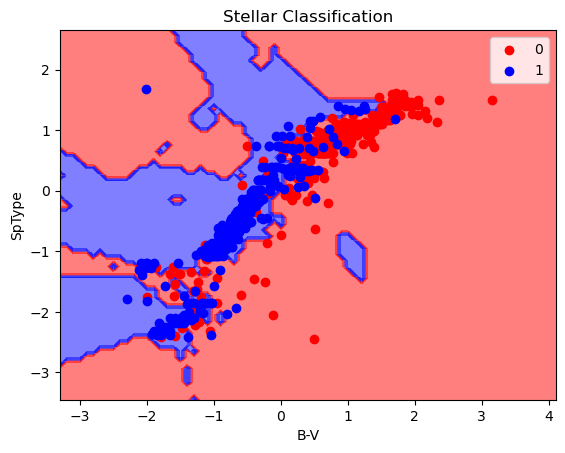

In [16]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, KNN.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

## Support Vector Machine

In [17]:
from sklearn.svm import SVC

parameters = {
    "C": 1.0,
    "kernel": "rbf",
    "gamma": "scale",
    "degree": 3,
    "coef0": 0.0,
    "shrinking": True,
    "probability": False,
    "tol": 0.001,
    "class_weight": None,
    "verbose": False,
    "max_iter": -1,
    "decision_function_shape": "ovr",
    "random_state": None
}

svm_classifier = SVC(**parameters)

In [18]:
svm_classifier.fit(train_x,train_y)

SVC()

In [19]:
SVM_Predictions = svm_classifier.predict(test_x)

SVM_report = classification_report(test_y,SVM_Predictions,labels=[1,0])

print(SVM_report)

              precision    recall  f1-score   support

           1       0.86      0.87      0.86       359
           0       0.87      0.86      0.87       370

    accuracy                           0.87       729
   macro avg       0.87      0.87      0.87       729
weighted avg       0.87      0.87      0.87       729



In [34]:
SVM_accuracy = accuracy_score(test_y,SVM_Predictions)

SVM_accuracy

0.8655692729766804

In [40]:
SVM_matrix = confusion_matrix(test_y,SVM_Predictions, labels = [1,0])

print(SVM_matrix)

[[311  48]
 [ 50 320]]


/var/folders/13/69ds98712kl8jghwycgkkmdr0000gn/T/ipykernel_47686/2957505778.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


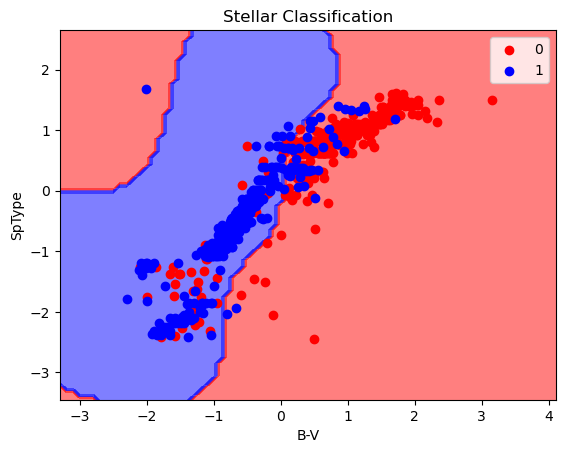

In [56]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, svm_classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

## Random Forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

RF_model = RandomForestClassifier(**parameters)

In [22]:
RF_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

In [35]:
RF_predictions = RF_model.predict(test_x)

RF_report = classification_report(test_y,RF_predictions,labels=[1,0])

print(RF_report)

              precision    recall  f1-score   support

           1       0.88      0.93      0.90       359
           0       0.93      0.88      0.90       370

    accuracy                           0.90       729
   macro avg       0.90      0.90      0.90       729
weighted avg       0.91      0.90      0.90       729



In [37]:
RF_accuracy = accuracy_score(test_y,RF_predictions)

RF_accuracy

0.9039780521262003

In [39]:
RF_matrix = confusion_matrix(test_y,RF_predictions, labels = [1,0])

print(RF_matrix)

[[333  26]
 [ 44 326]]


/var/folders/13/69ds98712kl8jghwycgkkmdr0000gn/T/ipykernel_47686/416100564.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


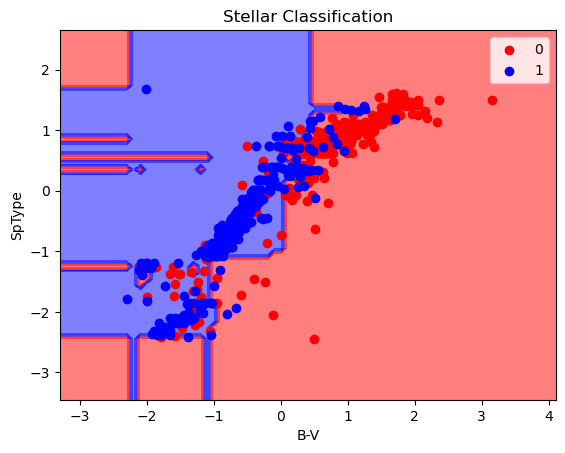

In [24]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, RF_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'penalty': 'l2',
    'C': 1.0,
    'fit_intercept': True,
    'solver': 'lbfgs',
    'max_iter': 100,
    'multi_class': 'auto',
    'random_state': None
}

logistic_regression_model = LogisticRegression(**parameters)

In [26]:
logistic_regression_model.fit(train_x,train_y)

LogisticRegression()

In [41]:
logistic_regression_predictions = logistic_regression_model.predict(test_x)



logistic_regression_report = classification_report(test_y,logistic_regression_predictions,labels=[1,0])

print(logistic_regression_report)

              precision    recall  f1-score   support

           1       0.86      0.88      0.87       359
           0       0.88      0.86      0.87       370

    accuracy                           0.87       729
   macro avg       0.87      0.87      0.87       729
weighted avg       0.87      0.87      0.87       729



In [42]:
logistic_regression_accuracy = accuracy_score(test_y,logistic_regression_predictions)

logistic_regression_accuracy

0.8710562414266118

In [43]:
logistic_regression_matrix = confusion_matrix(test_y,logistic_regression_predictions, labels = [1,0])

print(logistic_regression_matrix)

[[316  43]
 [ 51 319]]


/var/folders/13/69ds98712kl8jghwycgkkmdr0000gn/T/ipykernel_47686/3613218897.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


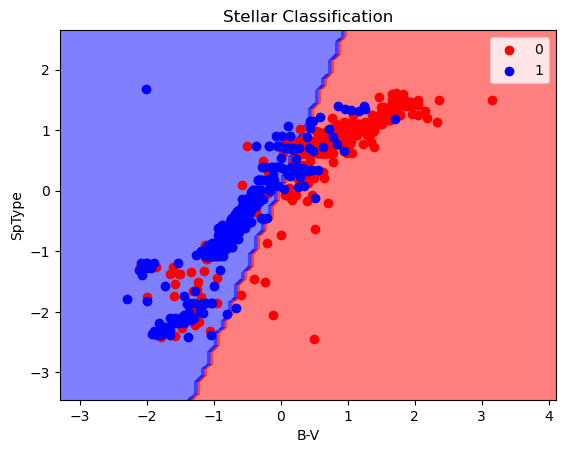

In [28]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, logistic_regression_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': 'gini',
    'splitter': 'best',
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': None,
    'random_state': None
}

decision_tree_model = DecisionTreeClassifier(**parameters)

In [30]:
decision_tree_model.fit(train_x,train_y)

DecisionTreeClassifier()

In [44]:
decision_tree_predictions = decision_tree_model.predict(test_x)

decision_tree_report = classification_report(test_y,decision_tree_predictions,labels=[1,0])

print(decision_tree_report)

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       359
           0       0.95      0.92      0.93       370

    accuracy                           0.93       729
   macro avg       0.93      0.93      0.93       729
weighted avg       0.93      0.93      0.93       729



In [46]:
decision_tree_accuracy = accuracy_score(test_y,decision_tree_predictions)

decision_tree_accuracy

0.934156378600823

In [47]:
decision_tree_matrix = confusion_matrix(test_y,decision_tree_predictions, labels = [1,0])

print(decision_tree_matrix)

[[341  18]
 [ 30 340]]


/var/folders/13/69ds98712kl8jghwycgkkmdr0000gn/T/ipykernel_47686/3698209738.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


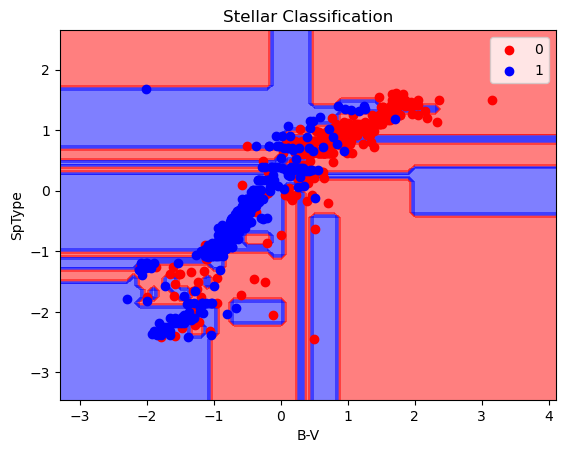

In [32]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, decision_tree_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()